## Packages

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTEENN
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Read the bank marketing data from a CSV file and create a DataFrame
df_bank_additional_full= pd.read_csv('bank-additional/bank-additional-full.csv', delimiter=';')
df_bank_additional_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df_bank_additional_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df_bank_additional= pd.read_csv('bank-additional/bank-additional.csv', delimiter=';')
df_bank_additional.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [5]:
# Combine two dataframes into a single dataframe using concat() function
data = pd.concat([df_bank_additional_full, df_bank_additional])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45307 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45307 non-null  int64  
 1   job             45307 non-null  object 
 2   marital         45307 non-null  object 
 3   education       45307 non-null  object 
 4   default         45307 non-null  object 
 5   housing         45307 non-null  object 
 6   loan            45307 non-null  object 
 7   contact         45307 non-null  object 
 8   month           45307 non-null  object 
 9   day_of_week     45307 non-null  object 
 10  duration        45307 non-null  int64  
 11  campaign        45307 non-null  int64  
 12  pdays           45307 non-null  int64  
 13  previous        45307 non-null  int64  
 14  poutcome        45307 non-null  object 
 15  emp.var.rate    45307 non-null  float64
 16  cons.price.idx  45307 non-null  float64
 17  cons.conf.idx   45307 non-null  

In [7]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Dropping less meaningful columns 

Based on our analysis target, these columns are not useful for our analysis.

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric)

12 - campaign: number of contacts performed during this campaign and for this client 

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

In [9]:
# drop columns 
data = data.drop(['contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'poutcome'], axis=1)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45307 entries, 0 to 4118
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45307 non-null  int64  
 1   job             45307 non-null  object 
 2   marital         45307 non-null  object 
 3   education       45307 non-null  object 
 4   default         45307 non-null  object 
 5   housing         45307 non-null  object 
 6   loan            45307 non-null  object 
 7   previous        45307 non-null  int64  
 8   emp.var.rate    45307 non-null  float64
 9   cons.price.idx  45307 non-null  float64
 10  cons.conf.idx   45307 non-null  float64
 11  euribor3m       45307 non-null  float64
 12  nr.employed     45307 non-null  float64
 13  y               45307 non-null  object 
dtypes: float64(5), int64(2), object(7)
memory usage: 5.2+ MB


## Data Visualization

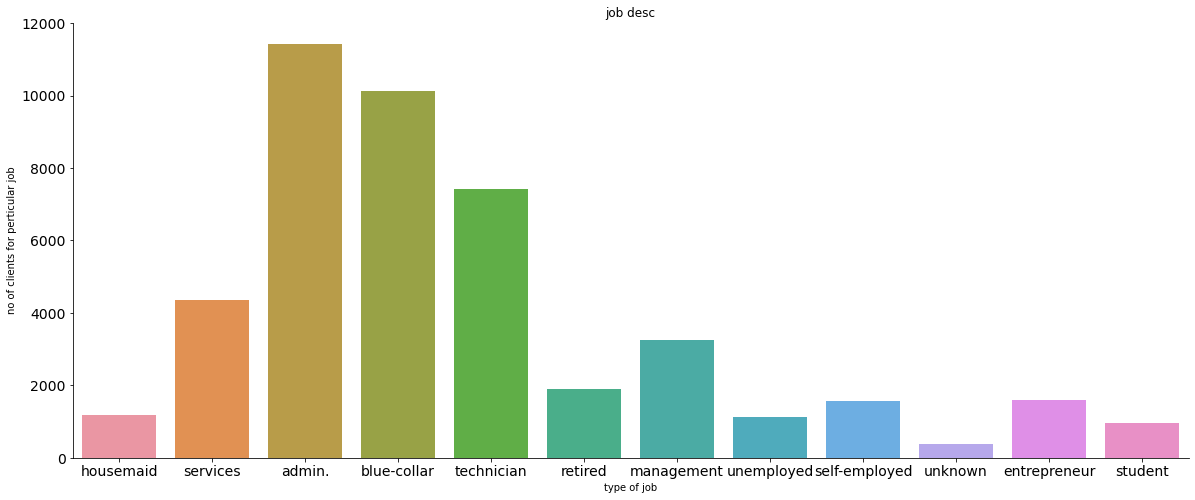

In [11]:
fig,ax=plt.subplots()
fig.set_size_inches(20,8)
sns.countplot(x='job',data=data)
ax.set_xlabel('type of job')
ax.set_ylabel('no of clients for perticular job')
ax.set_title('job desc')
ax.tick_params(labelsize=14)
sns.despine()

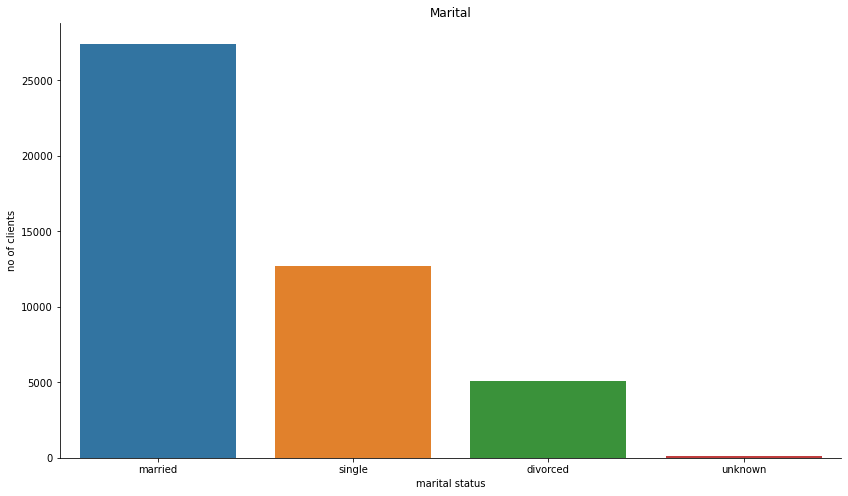

In [12]:
fig,ax=plt.subplots()
fig.set_size_inches(14,8)
sns.countplot(x='marital',data=data)
ax.set_xlabel('marital status')
ax.set_ylabel('no of clients')
ax.set_title('Marital')
sns.despine()

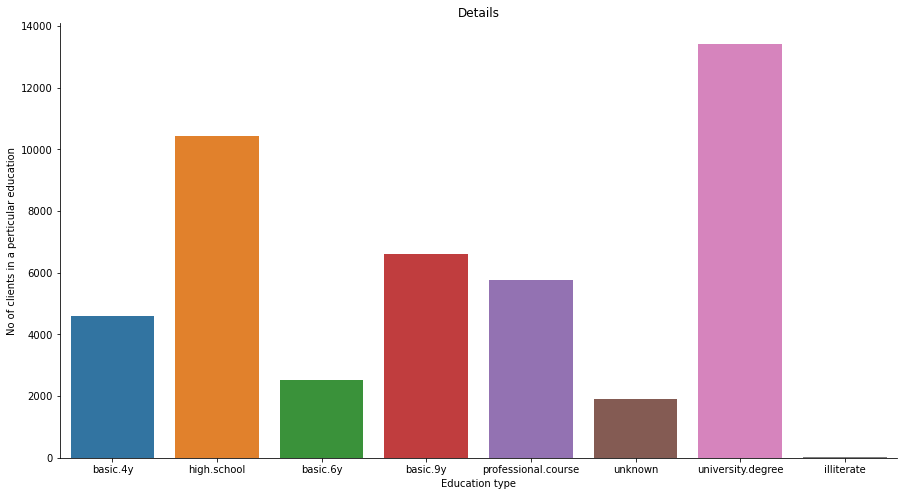

In [13]:
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
sns.countplot(x='education',data=data)
ax.set_xlabel('Education type')
ax.set_ylabel('No of clients in a perticular education')
ax.set_title('Details')
sns.despine()

<AxesSubplot:xlabel='loan', ylabel='count'>

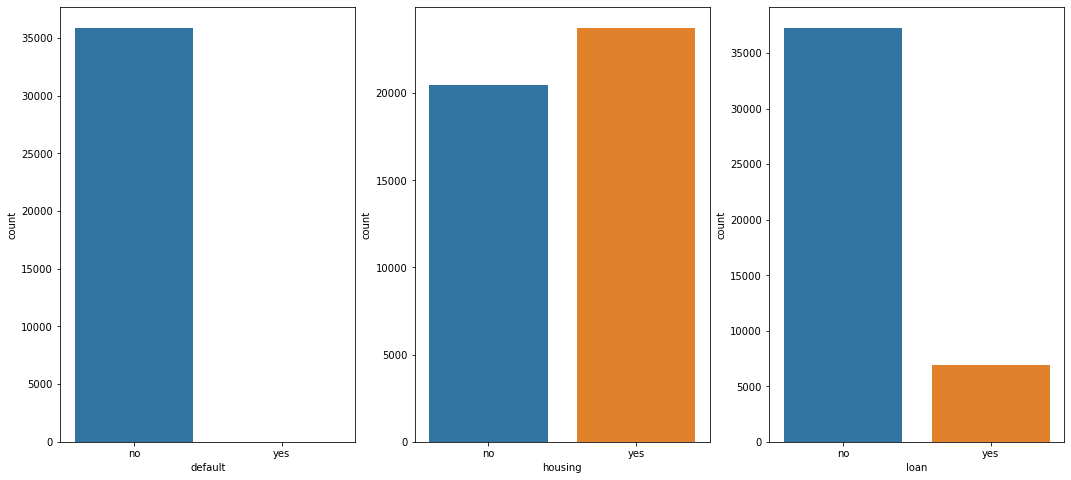

In [14]:
fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(18,8))
sns.countplot(x='default',data=data,ax=ax1,order=['no','yes'])
sns.countplot(x='housing',data=data,ax=ax2,order=['no','yes'])
sns.countplot(x='loan',data=data,ax=ax3,order=['no','yes'])

<AxesSubplot:xlabel='y', ylabel='count'>

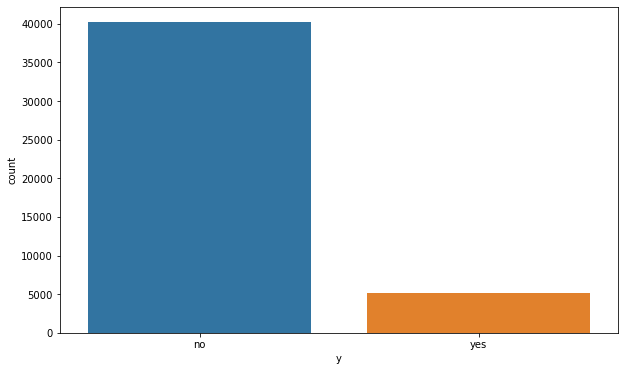

In [15]:
fig,(ax1)=plt.subplots(nrows=1,ncols=1,figsize=(10,6))
sns.countplot(x='y',data=data,ax=ax1,order=['no','yes'])

## Label Encoding

In [16]:
# create a list of categorical columns
cat_cols = [col for col in data.columns if data[col].dtype == 'object']

# use LabelEncoder to convert each categorical column to numerical
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

In [17]:
data.head()

,age,job,marital,education,default,housing,loan,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,0,1.1,93.994,-36.4,4.857,5191.0,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45307 entries, 0 to 4118
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45307 non-null  int64  
 1   job             45307 non-null  int64  
 2   marital         45307 non-null  int64  
 3   education       45307 non-null  int64  
 4   default         45307 non-null  int64  
 5   housing         45307 non-null  int64  
 6   loan            45307 non-null  int64  
 7   previous        45307 non-null  int64  
 8   emp.var.rate    45307 non-null  float64
 9   cons.price.idx  45307 non-null  float64
 10  cons.conf.idx   45307 non-null  float64
 11  euribor3m       45307 non-null  float64
 12  nr.employed     45307 non-null  float64
 13  y               45307 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 5.2 MB


In [19]:
# Convert object columns to int columns
obj_cols = [col for col in data.columns if data[col].dtype == 'object']

for col in obj_cols:
    data[col] = data[col].astype(int)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45307 entries, 0 to 4118
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45307 non-null  int64  
 1   job             45307 non-null  int64  
 2   marital         45307 non-null  int64  
 3   education       45307 non-null  int64  
 4   default         45307 non-null  int64  
 5   housing         45307 non-null  int64  
 6   loan            45307 non-null  int64  
 7   previous        45307 non-null  int64  
 8   emp.var.rate    45307 non-null  float64
 9   cons.price.idx  45307 non-null  float64
 10  cons.conf.idx   45307 non-null  float64
 11  euribor3m       45307 non-null  float64
 12  nr.employed     45307 non-null  float64
 13  y               45307 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 5.2 MB


## Splitting into train and test data

In [21]:
X=data.drop(['y'],axis=1)
y= data['y']
y.value_counts()

0    40216
1     5091
Name: y, dtype: int64

In [22]:
# Using SMOTE with random state 42 to ensure reproducibility
# Oversampling the dataset by creating synthetic samples of the minority class
# X_resampled and y_resampled will contain the oversampled data

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [23]:
X = X_resampled
y = y_resampled

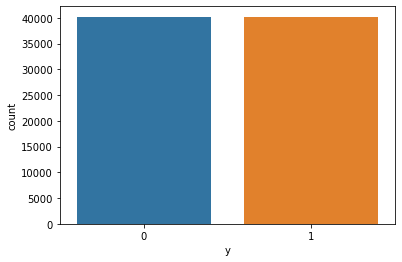

In [24]:
# Create a countplot with seaborn
sns.countplot(x=y, data=data)
plt.show()

In [25]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(X)

# Convert the scaled data back to a dataframe
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)
X = scaled_df

In [26]:
# Splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Logistic Regression

In [27]:
# Define your hyperparameters and the possible values for each
hyperparameters = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                   'C': [0.001, 0.01, 0.1, 1, 10],
                   'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                   'max_iter': [100, 500, 1000],
                   'multi_class': ['auto', 'ovr', 'multinomial']}

# Create an instance of the logistic regression model
lr = LogisticRegression()

# Create an instance of the GridSearchCV class with your hyperparameters and evaluation metric
lrg_grid_search = GridSearchCV(lr, hyperparameters, cv=5, scoring='accuracy')

# Fit the GridSearchCV instance to your data
lrg_grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters
print(lrg_grid_search.best_params_)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalt

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalt

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalt

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalt

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalt

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalt

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalt

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalt

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalt

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalt

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalt

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalt

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalt

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalt

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalt

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalt

{'C': 0.1, 'max_iter': 100, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}


In [28]:
y_pred_train = lrg_grid_search.predict(X_train)
y_pred_test = lrg_grid_search.predict(X_test)

In [29]:
lrg_train_acc = lrg_grid_search.score(X_train, y_train)
lrg_test_acc = lrg_grid_search.score(X_test, y_test)

print(f'Training Accuracy: {lrg_train_acc: .2f}')
print(f'Test Accuracy: {lrg_test_acc: .2f}')

Training Accuracy:  0.73
Test Accuracy:  0.73


In [30]:
cm = confusion_matrix(y_test, y_pred_test)
print (cm)

[[7727 2315]
 [3116 6950]]


In [31]:
precision_train = precision_score(y_train, y_pred_train)
print(f'Precision Train: {precision_train: .2f}')

precision_test = precision_score(y_test, y_pred_test)
print(f'Precision Test: {precision_test: .2f}')

Precision Train:  0.75
Precision Test:  0.75


In [32]:
recall_train = recall_score(y_train, y_pred_train)
print(f'Recall Train: {recall_train: .2f}')

recall_test = recall_score(y_test, y_pred_test)
print(f'Recall Test: {recall_test: .2f}')

Recall Train:  0.70
Recall Test:  0.69


In [33]:
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy on training set: {:.2f}".format(accuracy_train))

accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy on testing set: {:.2f}".format(accuracy_test))

Accuracy on training set: 0.73
Accuracy on testing set: 0.73


In [34]:
f1_train = f1_score(y_train, y_pred_train)
print(f'F1 Train: {f1_train: .2f}')

f1_test = f1_score(y_test, y_pred_test)
print(f'F1 Test: {f1_test: .2f}')

F1 Train:  0.72
F1 Test:  0.72


In [35]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74     10042
           1       0.75      0.69      0.72     10066

    accuracy                           0.73     20108
   macro avg       0.73      0.73      0.73     20108
weighted avg       0.73      0.73      0.73     20108



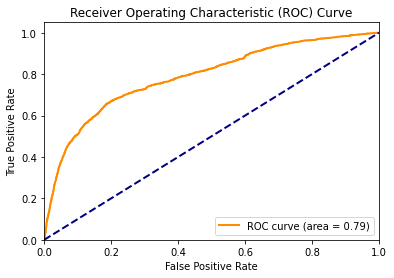

In [36]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, lrg_grid_search.predict_proba(X_test)[:,1])
logit_roc_auc = roc_auc_score(y_test, lrg_grid_search.predict_proba(X_test)[:,1], average='weighted', multi_class='ovr')

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [37]:
lrg_mean_fit_time = np.mean(lrg_grid_search.cv_results_['mean_fit_time'])
print(lrg_mean_fit_time)

0.12668463246027628


In [38]:
lrg_best_params=lrg_grid_search.best_params_
print(lrg_best_params)

{'C': 0.1, 'max_iter': 100, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}


## Decision Tree


In [39]:
params = {'max_depth': [2, 3, 4, 5],
          'min_samples_split': [2, 3, 4, 5],
          'min_samples_leaf': [1, 2, 3, 4]}
tree = DecisionTreeClassifier()
decision_grid_search = GridSearchCV(tree, params, cv=5, scoring='accuracy').fit(X_train, y_train)


In [40]:
grid_train_acc = decision_grid_search.score(X_train, y_train)
grid_test_acc = decision_grid_search.score(X_test, y_test)
best_params = decision_grid_search.best_params_
dec_mean_fit_time = np.mean(decision_grid_search.cv_results_['mean_fit_time'])
print(f'Training Accuracy: {grid_train_acc: .2f}')
print(f'Test Accuracy: {grid_test_acc: .2f}')
print(f'Best parameters of tree: {best_params}')
print(dec_mean_fit_time)

Training Accuracy:  0.78
Test Accuracy:  0.77
Best parameters of tree: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.05987225696444511


In [41]:
y_pred_dec_train = decision_grid_search.predict(X_train)
y_pred_dec_test = decision_grid_search.predict(X_test)
print(classification_report(y_test, y_pred_dec_test))

              precision    recall  f1-score   support

           0       0.72      0.91      0.80     10042
           1       0.87      0.64      0.74     10066

    accuracy                           0.77     20108
   macro avg       0.80      0.77      0.77     20108
weighted avg       0.80      0.77      0.77     20108



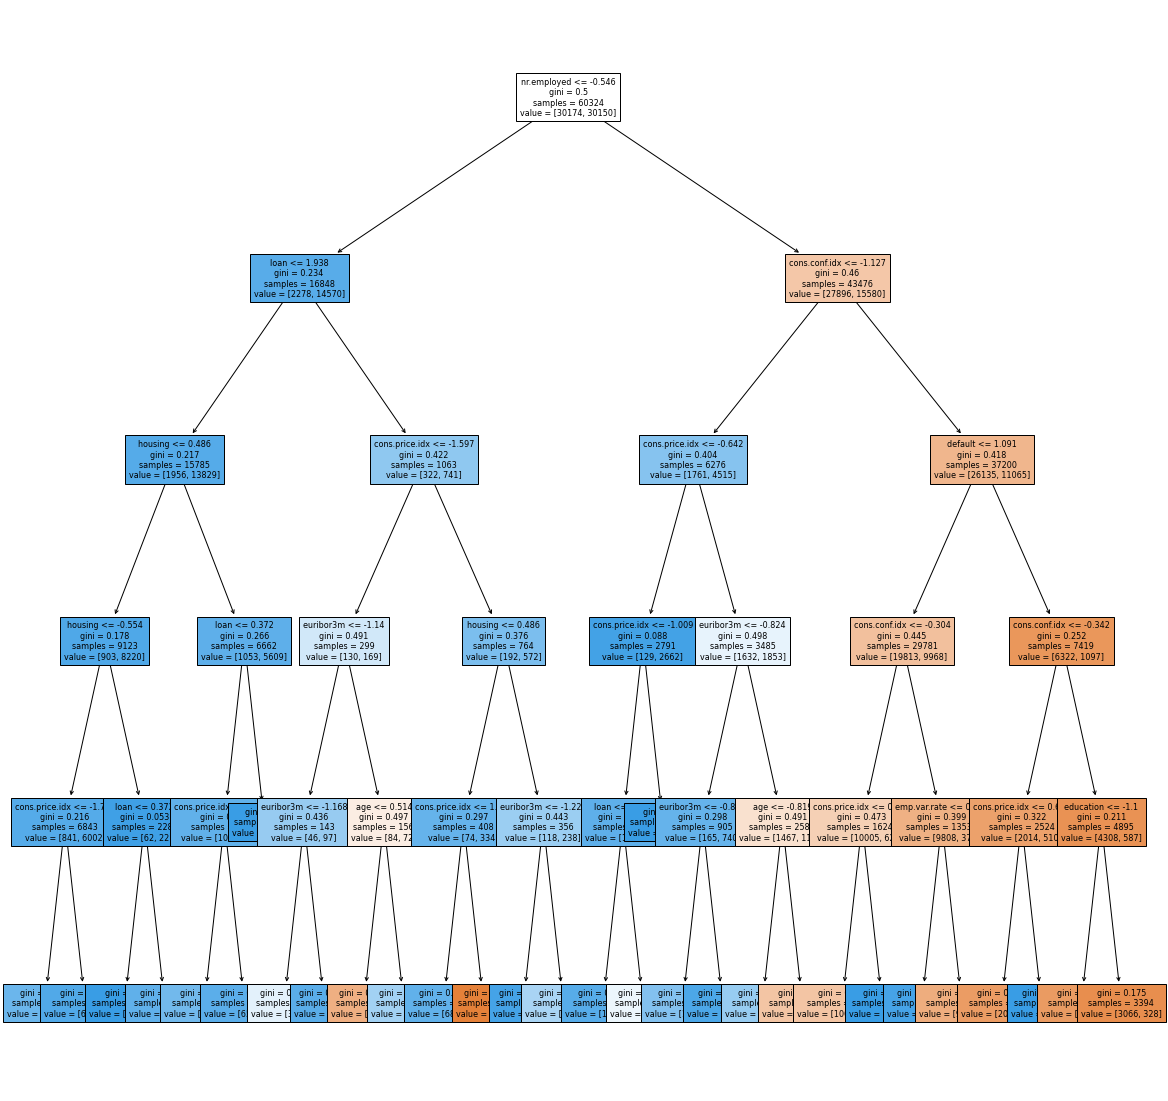

In [42]:
fig, ax = plt.subplots(figsize = (20, 20))
plot_tree(decision_grid_search.best_estimator_, feature_names=list(X_train.columns), filled=True, ax = ax, fontsize=8);

## KNN

In [43]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

In [44]:
knn_grid_search = GridSearchCV(knn, param_grid, cv=5).fit(X_train, y_train)

In [45]:
knn_train_acc = knn_grid_search.score(X_train, y_train)
knn_test_acc = knn_grid_search.score(X_test, y_test)
knn_best_params = knn_grid_search.best_params_
knn_mean_fit_time = np.mean(knn_grid_search.cv_results_['mean_fit_time'])
print(f'Training Accuracy: {knn_train_acc: .2f}')
print(f'Test Accuracy: {knn_test_acc: .2f}')
print(f'Best parameters: {knn_best_params}')
print(knn_mean_fit_time)

Training Accuracy:  0.99
Test Accuracy:  0.88
Best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
0.0450300415356954


In [46]:
y_pred_knn_train = knn_grid_search.predict(X_train)
y_pred_knn_test = knn_grid_search.predict(X_test)
print(classification_report(y_test, y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88     10042
           1       0.87      0.91      0.89     10066

    accuracy                           0.88     20108
   macro avg       0.88      0.88      0.88     20108
weighted avg       0.88      0.88      0.88     20108



## SVC

In [47]:
svc_mean_fit_time=0
svc = SVC()
params = {'kernel': ['linear']}
svc = SVC().fit(X_train, y_train)

In [48]:
svc_grid_search = GridSearchCV(svc, param_grid=params).fit(X_train, y_train)
svc_train_acc = svc_grid_search.score(X_train, y_train)
svc_test_acc = svc_grid_search.score(X_test, y_test)
svc_best_params = svc_grid_search.best_params_
svc_mean_fit_time = np.mean(svc_grid_search.cv_results_['mean_fit_time'])
print(f'Training Accuracy: {svc_train_acc: .2f}')
print(f'Test Accuracy: {svc_test_acc: .2f}')
print(f'Best parameters: {svc_best_params}')
print(svc_mean_fit_time)

Training Accuracy:  0.72
Test Accuracy:  0.71
Best parameters: {'kernel': 'linear'}
196.99273519515992


In [49]:
y_pred_svc_train = svc_grid_search.predict(X_train)
y_pred_svc_test = svc_grid_search.predict(X_test)
print(classification_report(y_test, y_pred_svc_test))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71     10042
           1       0.71      0.71      0.71     10066

    accuracy                           0.71     20108
   macro avg       0.71      0.71      0.71     20108
weighted avg       0.71      0.71      0.71     20108



## Summarizing Results

In [50]:
results_df = ''


res_dict = {'model': ['Logistic Regression','Decision Tree', 'KNN','SVC'],
            'Training Accuracy': [lrg_train_acc, grid_train_acc,knn_train_acc,svc_train_acc],
            'Test Accuracy': [lrg_test_acc,grid_test_acc,knn_test_acc,svc_test_acc],
            'Best parameters': [lrg_best_params, best_params,knn_best_params,svc_best_params],
            'Mean Fit Time':[lrg_mean_fit_time,dec_mean_fit_time,knn_mean_fit_time,svc_mean_fit_time]}
results_df = pd.DataFrame(res_dict).set_index('model')

results_df

,Training Accuracy,Test Accuracy,Best parameters,Mean Fit Time
model,,,,
Logistic Regression,0.734368,0.729908,"{'C': 0.1, 'max_iter': 100, 'multi_class': 'mu...",0.126685
Decision Tree,0.780071,0.774816,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.059872
KNN,0.989440,0.884175,"{'metric': 'manhattan', 'n_neighbors': 3, 'wei...",0.045030
SVC,0.718454,0.710613,{'kernel': 'linear'},196.992735


<AxesSubplot:xlabel='model', ylabel='Mean Fit Time'>

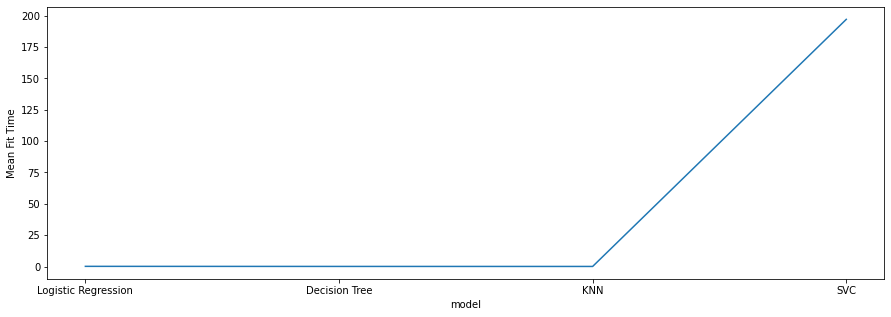

In [51]:
# Create a line plot of Mean Fit Time for each model
fig = plt.subplots(figsize=(15, 5))
sns.lineplot(data=results_df , x="model", y="Mean Fit Time")

<AxesSubplot:xlabel='model', ylabel='Test Accuracy'>

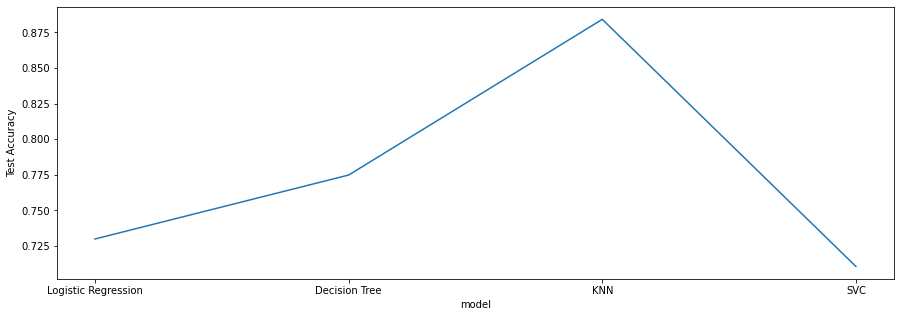

In [52]:
# Create a line plot of test accuracy for each model
fig = plt.subplots(figsize=(15, 5))
sns.lineplot(data=results_df , x="model", y="Test Accuracy")

## Conclusions based on Accuracy

Based on the information provided in the table, we can conclude that:

All models have achieved reasonable training accuracy, with KNN model having the highest training accuracy (0.989) followed by Decision Tree model (0.780) and Logistic Regression model (0.734).

KNN model has the highest test accuracy (0.884) followed by Decision Tree model (0.775) and Logistic Regression model (0.730).

Logistic Regression model has the lowest mean fit time (0.127), followed by Decision Tree model (0.060), KNN model (0.045), and finally, SVC model (196.993).

Based on the above observations, we can conclude that the KNN model has the best test accuracy, although it has overfitted the training data. The Decision Tree model has a reasonably high test accuracy and a lower tendency to overfit than the KNN model. The Logistic Regression model has reasonable performance on both training and test data, and also has the shortest mean fit time. The SVC model has the lowest test accuracy and the highest mean fit time, indicating that it may not be the best choice for this particular dataset.

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

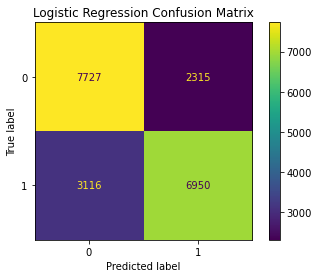

In [53]:
#logreg 
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test)).plot()
plt.grid(False)
plt.title("Logistic Regression Confusion Matrix")

In [54]:
# Compute precision, recall, and F1-score from confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
tp = cm[0, 0]
fn = cm[0, 1]
fp = cm[1, 0]
tn = cm[1, 1]
precision_lrg = tp / (tp + fp)
recall_lrg = tp / (tp + fn)
f1score_lrg = f1_score(y_test, y_pred_test)

Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

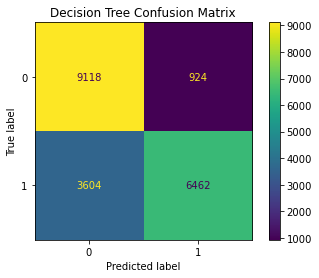

In [55]:
#decision tree
ConfusionMatrixDisplay(confusion_matrix(y_test,  y_pred_dec_test)).plot()
plt.grid(False)
plt.title("Decision Tree Confusion Matrix")

In [56]:
# Compute precision, recall, and F1-score from confusion matrix
cm = confusion_matrix(y_test, y_pred_dec_test)
tp = cm[0, 0]
fn = cm[0, 1]
fp = cm[1, 0]
tn = cm[1, 1]
precision_dtree = tp / (tp + fp)
recall_dtree = tp / (tp + fn)
f1score_dtree = f1_score(y_test, y_pred_dec_test)

Text(0.5, 1.0, 'knn')

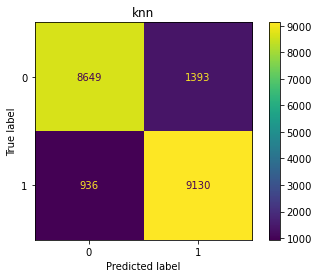

In [57]:
#knn
ConfusionMatrixDisplay(confusion_matrix(y_test,  y_pred_knn_test)).plot()
plt.grid(False)
plt.title("knn")

In [58]:
# Compute precision, recall, and F1-score from confusion matrix
cm = confusion_matrix(y_test, y_pred_knn_test)
tp = cm[0, 0]
fn = cm[0, 1]
fp = cm[1, 0]
tn = cm[1, 1]
precision_knn = tp / (tp + fp)
recall_knn = tp / (tp + fn)
f1score_knn = f1_score(y_test, y_pred_knn_test)

Text(0.5, 1.0, 'SVC Confusion Matrix')

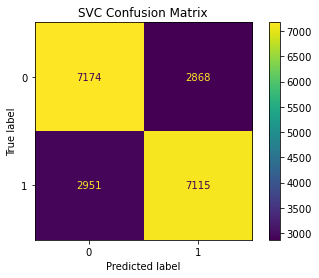

In [59]:
#svc
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_svc_test)).plot()
plt.grid(False)
plt.title("SVC Confusion Matrix")

In [60]:
# Compute precision, recall, and F1-score from confusion matrix
cm = confusion_matrix(y_test, y_pred_svc_test)
tp = cm[0, 0]
fn = cm[0, 1]
fp = cm[1, 0]
tn = cm[1, 1]
precision_svc = tp / (tp + fp)
recall_svc = tp / (tp + fn)
f1score_svc = f1_score(y_test, y_pred_svc_test)

## Summarizing results using a confusion matrix

In [61]:
results_df1 = ''


res_dict = {'model': ['Logistic Regression','Decision Tree', 'KNN','SVC'],
            'Precision': [precision_lrg, precision_dtree,precision_knn,precision_svc],
            'Recall': [recall_lrg,recall_dtree,recall_knn,recall_svc],
            'F1score': [f1score_lrg, f1score_dtree,f1score_knn,f1score_svc]}
results_df1 = pd.DataFrame(res_dict).set_index('model')

results_df1

,Precision,Recall,F1score
model,,,
Logistic Regression,0.712626,0.769468,0.719052
Decision Tree,0.716711,0.907986,0.740545
KNN,0.902347,0.861283,0.886881
SVC,0.708543,0.714400,0.709761


## Conclusions based on Precision, Recall and F1score

Based on the information provided in the table, we can draw the following conclusions:

The KNN model has the highest F1 score (0.887) which indicates that it has a good balance between precision and recall.

The Decision Tree model has the highest recall (0.908) which means that it has the ability to identify most of the relevant instances in the dataset.

The Logistic Regression model has a reasonable performance in terms of both precision and recall, and has an F1 score of 0.719.

The SVC model has the lowest F1 score (0.710) and relatively low precision and recall values, indicating that this model is not performing well on this particular dataset.

Overall, the KNN model appears to be the best performing model based on its high F1 score and good balance between precision and recall. However, depending on the specific requirements and constraints of the problem, other models may be more suitable.

## Feature Importance in the KNN Model as a Best One

There are different ways to compute feature importance or weight assigned to each feature in a KNN (K-Nearest Neighbors) model in Python

In [62]:
knn_grid_search = GridSearchCV(knn, param_grid, cv=5).fit(X_train, y_train)
results = permutation_importance(knn_grid_search, X, y, scoring='accuracy')


In [63]:
# Print the feature importances

feature_names = np.array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'])


feature_names[1]

for i in results.importances_mean.argsort()[::-1]:
    print(f"{feature_names[i]:<8} "
          f"{results.importances_mean[i]:.3f}"
          f" +/- {results.importances_std[i]:.3f}")


age      0.202 +/- 0.001
education 0.174 +/- 0.001
job      0.170 +/- 0.001
housing  0.139 +/- 0.001
marital  0.119 +/- 0.001
cons.conf.idx 0.090 +/- 0.001
cons.price.idx 0.075 +/- 0.001
loan     0.071 +/- 0.000
euribor3m 0.059 +/- 0.000
previous 0.053 +/- 0.000
default  0.049 +/- 0.000
nr.employed 0.034 +/- 0.000
emp.var.rate 0.033 +/- 0.000


## Visualize the importance of features

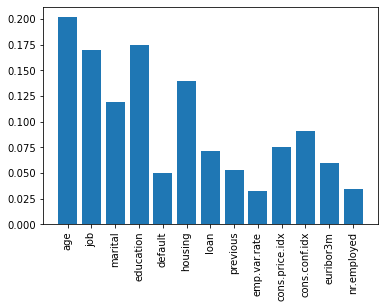

In [64]:
plt.bar(X.columns, results.importances_mean)
plt.xticks(rotation=90)
plt.show()

Based on the values provided, it appears that the "age" parameter has the highest permutation feature importance with a score of 0.202. The next most important parameters are "education" with a score of 0.176 and "job" with a score of 0.170. The remaining parameters have lower importance scores, with "emp.var.rate" and "nr.employed" having the lowest scores of 0.033 and 0.034, respectively.

## Create a new sample for prediction

In [65]:
# Create a new sample for prediction

new_sample_dic = {'age':45, 'job':'admin','marital':'married','education':'high.school','default':'no','housing':'yes','loan':'yes','previous':1,'emp.var.rate':-1.1,'cons.price.idx':93.994,'cons.conf.idx':-51,'euribor3m':4.5,'nr.employed':4963.6}  # replace with your own values

new_sample = list(new_sample_dic.values())

encoded_sample = le.fit_transform(new_sample)

encoded_sample
new_sample1 = encoded_sample.reshape(1, -1)   # reshape to a 2D array

## Predict the class of the new sample

In [66]:
prediction = knn_grid_search.predict(new_sample1)

print('Prediction:', prediction)

Prediction: [0]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Findings

1- The most crucial features for marketing are age, education, job, housing, and marital status. Therefore, by focusing on these five features, one can expedite their decision-making process and reduce expenses.

2- Since age is a crucial factor, targeting younger demographics such as colleges and universities can be a focus for increasing subscribers.

3- By utilizing this analysis, one can make a preliminary assessment of a customer before making a call, enabling them to assign a more experienced marketer to customers who are less likely to subscribe.

4- To encourage non-subscribers and increase the number of subscribers, they can offer certain advantages or incentives.